# 07. Комбинаторная редукция

<div style="text-align: right"> 
    
    Лекция 7.2 19/03/21 
    
    Кубенский Александр Александрович
    
    akoubensky@gmail.com
</div> 

Задача: избавиться от имен переменных (и, соответственно, лямбда-выражений) введением
чистого комбинаторного программирования, подобно тому, как это делалось в FP-системе.

Введем *следующие комбинаторы*:

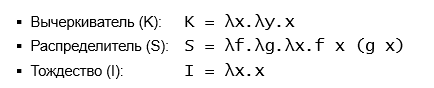

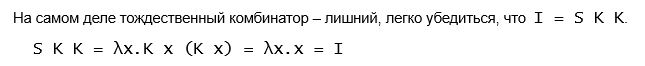

Для определения семантики этих комбинаторов нет нужды опираться на лямбда-выражения, лучше просто определить правила применения:

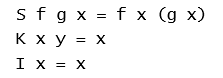

Такие правила называются $\delta$-правилами.

Теперь можно определить правила редукции графов, в которых нет лямбда выражений, а есть только применения конструкторов и комбинаторов. Важно, что при этом можно избежать копирования, однако интенсивно используются вершины-синонимы, так как по крайней мере два из трех введенных комбинаторов являются чистыми селекторами.

## Правила абстрагирования от переменных

Покажем, что в самом деле можно любое замкнутое лямбда-выражение представить в комбинаторной форме. Для этого сначала введем функцию абстрагирования `abs(x, E)` для комбинаторных выражений `E` такую, что



Другими словами, `abs(x, E)` ведет себя точно так же, как  `λx.E`.

Сокращенная запись для  `abs(x, E) – [x]E`

Очевидно, что:

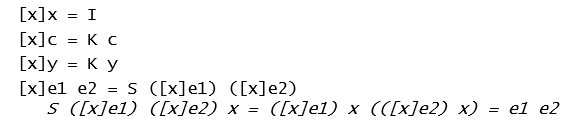

Теперь перевод любого лямбда выражения в комбинаторную форму можно производить по следующим правилам:

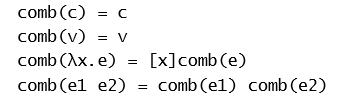

## Пример перевода выражения в комбинаторную форму

Рассмотрим следующую функцию: `λx.λy.+ x y`. Заметим, что для этой функции существует очень простая комбинаторная форма: `+`. Проведем преобразование этого лямбда-выражения:

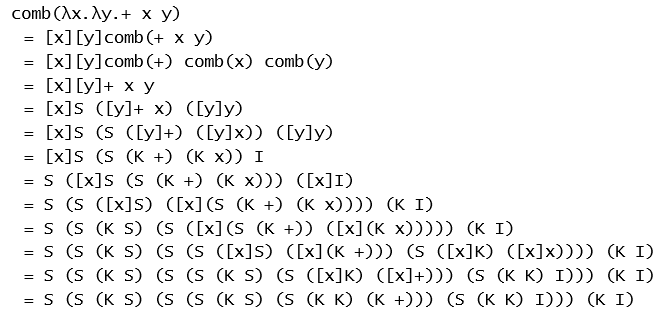

Это самое сложное выражение для функции сложения в курсе. Проверим, что при применении
этого выражения к константам, скажем, 2 и 3, мы действительно получим 5

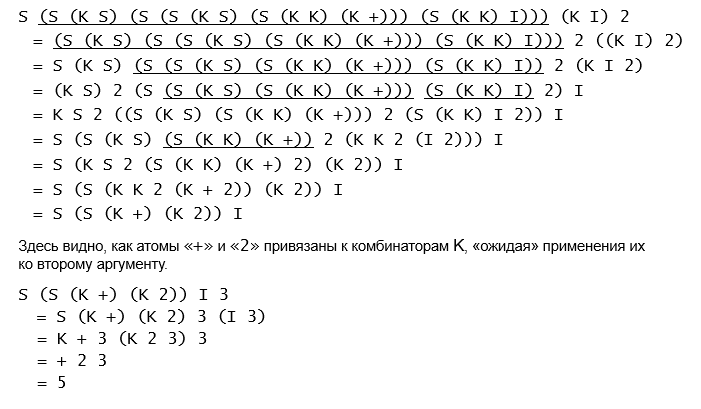

## Оптимизация Карри:

Если хочется упростить сложное комбинаторное выражение, то можно попробовать применить
эквивалентные преобразования выражений. Введем следующие правила:

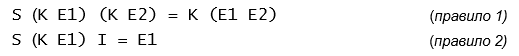

В корректности этих преобразований можно убедиться, установив, что при применении к одному
и тому же аргументу получается один и тот же результат:

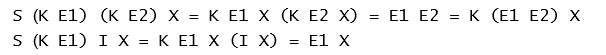

Еще один путь снизить сложность выражений – ввести дополнительные комбинаторы, например:

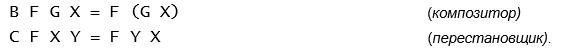

и дополнительные оптимизационные правила:

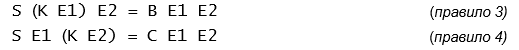

в справедливости которых можно убедиться путем следующих преобразований:

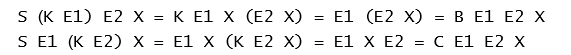

Попробуем проверить правила (1 – 4) на практике, преобразовав наше длинное выражение для
функции сложения.

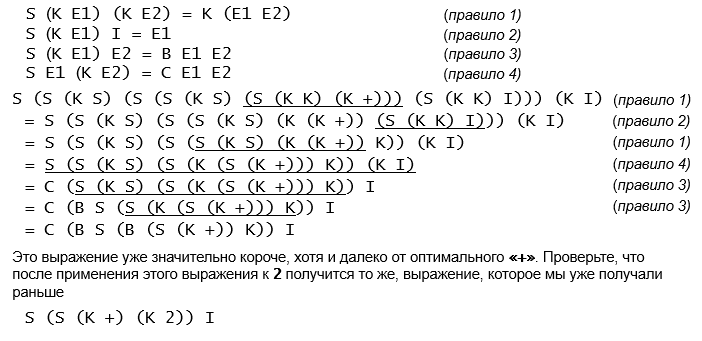

## Оптимизация Карри (продолжение)

Правила оптимизации и новые комбинаторы можно ввести непосредственно в алгоритм
преобразования лямбда-выражений в комбинаторную форму.

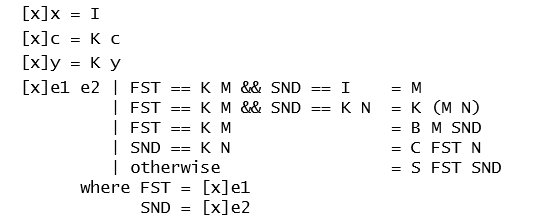

При применении этих правил преобразования могут дать гораздо более простой результат.

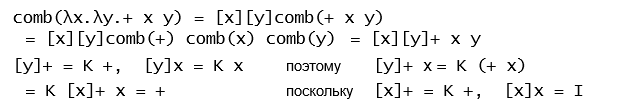

## Аппликативные подвыражения

Заметим, что если в исходном лямбда-выражении уже имелись подвыражения, имеющие
аппликативный вид **(e1 e2)**, то при его абстрагировании от переменной, не входящей в **e1 e2**
свободно, мы можем и не получить «естественную» форму **e1 e2**. Например,

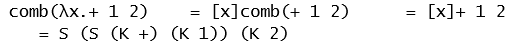

при неоптимизированных преобразованиях. Компоненты аппликативного подвыражения
распределяются по всему выражению.

Если применять правило (1) в оптимизации Карри, то выражение приобретет вид 

Сохранение аппликативных подвыражений важно для оптимизации вычислений, поскольку
позволяет разделять такие подвыражения более эффективно и сохранять «полную ленивость».

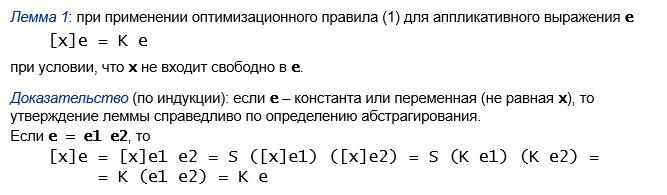

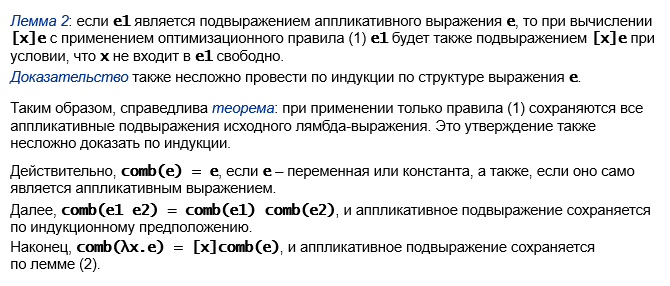